# Analysis of Traits Data (aka Fitting Models to Traits Data) <a class="tocSkip">

<!--NAVIGATION-->

<[Back to Workshop Contents](Index.ipynb)>

<div id="toc"> </div>

## Introduction

### Why traits?

A trait is any measurable feature of an individual organism. This includes physical traits (e.g., morphology, body mass, wing length), performance traits (e.g., respiration rate, body velocity, fecundity), and behavioral traits (e.g., feeding preference, foraging strategy, mate choice). All natural populations show variation in traits across individuals. A trait is functional when it directly (e.g., mortality rate) or indirectly (e.g., somatic development or growth rate) determines individual fitness. Therefore, variation in (functional) traits can generate variation in the rate of increase and persistence of populations. When measured in the context of life cycles, without considering interactions with other organisms (e.g., predators or prey of the vector), functional traits are typically called life history traits (such as mortality rate and fecundity). Other traits determine interactions both within the vector population (e.g., intraspecific interference or mating frequency) and between vectors and other species, including the species which may act as resources (prey, for example).

Thus both life history and interaction traits ultimately determine vector population [abundance](Abundances.ipynb), which ulimately influences disease transmission dynamics. Therefore, we will focus on traits in this section of the training workshop.

### Preliminaries

The following worked examples assume you have seen the [lectures](https://github.com/vectorbite/VBiTraining/tree/master/lectures).

You will need the `nls.lm` R package, which you can install using the standard method (linux users, launch R in `sudo` mode first):

```r
install.packages("minpack.lm") 
```

*Why `nls.lm`*? 
The standard NLLS function in R, cals `nls` uses a less robust algorithm called the Gauss-Newton algorithm. Therefore, `nls` will often fail to fit your model to the data if you start off at starting values for the parameters that are too far from what the optimal vaues would be, especially if the "parameter space" is weirdly shaped, i.e., the model has a mathematical form that makes it hard to find parameter combinations that minimize the NLLS. If this does not makes ense, don't worry about it- just go with `nls_LM` from the `nls.lm` package instead of `nls`! If you are really curious, try substituting `nls` for `nls_LM` in the examples below and compare the results.  

Now clear all variables and graphic devices, load the necessary packages, etc.:

In [52]:
rm(list = ls())
graphics.off()

library("minpack.lm") # for Levenberg-Marquardt nls fitting
library("ggplot2")
library(repr)
options(repr.plot.width=5, repr.plot.height=5) # Change default plot size; not necessary if you are using Rstudio

## Allometric scaling of traits

Let's start with a common and reasonably simple example from biology: [allometric scaling](https://en.wikipedia.org/wiki/Allometry). We will look at allometric scaling of body weight vs. total body length in dragonflies and damselfiles. 

Allometric relationships take the form:

<a id='eq:allom'></a>
\begin{equation} \label{eq:allom}
y = a x^b
\end{equation} 

where $x$ and $y$ are morphological measures (body length and body weight respectively, in our current example), the constant is the value of $y$ at body length $x = 1$ unit, and $b$ is the scaling "exponent". This is also called a power-law, because $y$ relates to $x$ through a simple power. 

First create a function object for the power law model:

In [53]:
powMod <- function(x, a, b) {
    return(a * x^b)
}

Now get the [data](https://raw.githubusercontent.com/mhasoba/TheMulQuaBio/master/Data/GenomeSize.csv) (first click on link and use "Save as" or `Ctrl+S` to download it as a csv). Then, save it in your `data` directory. After that, import it into your R workspace:

In [54]:
MyData <- read.csv("../data/GenomeSize.csv")

head(MyData)

Suborder,Family,Species,GenomeSize,GenomeSE,GenomeN,BodyWeight,TotalLength,HeadLength,ThoraxLength,AdbdomenLength,ForewingLength,HindwingLength,ForewingArea,HindwingArea,MorphologyN
Anisoptera,Aeshnidae,Aeshna canadensis,2.20,NA,1,0.159,67.58,6.83,11.81,48.94,45.47,45.40,369.57,483.61,2
Anisoptera,Aeshnidae,Aeshna constricta,1.76,0.06,4,0.228,71.97,6.84,10.72,54.41,46.00,45.48,411.15,517.38,3
Anisoptera,Aeshnidae,Aeshna eremita,1.85,NA,1,0.312,78.80,6.27,16.19,56.33,51.24,49.47,460.72,574.33,1
Anisoptera,Aeshnidae,Aeshna tuberculifera,1.78,0.10,2,0.218,72.44,6.62,12.53,53.29,49.84,48.82,468.74,591.42,2
Anisoptera,Aeshnidae,Aeshna umbrosa,2.00,NA,1,0.207,73.05,4.92,11.11,57.03,46.51,45.97,382.48,481.44,1
Anisoptera,Aeshnidae,Aeshna verticalis,1.59,NA,1,0.220,66.25,6.48,11.64,48.13,45.91,44.91,400.40,486.97,1


[Anisoptera](https://en.wikipedia.org/wiki/Dragonfly) are dragonflies, and [Zygoptera](https://en.wikipedia.org/wiki/Damselfly) are Damselflies. The variables of interest are `BodyWeight` and `TotalLength`.  Let's use the dragonflies data subset. 

So subset the data accordingly and remove NAs:

In [55]:
Data2Fit <- subset(MyData,Suborder == "Anisoptera")

Data2Fit <- Data2Fit[!is.na(Data2Fit$TotalLength),] # remove NA's

Plot it:

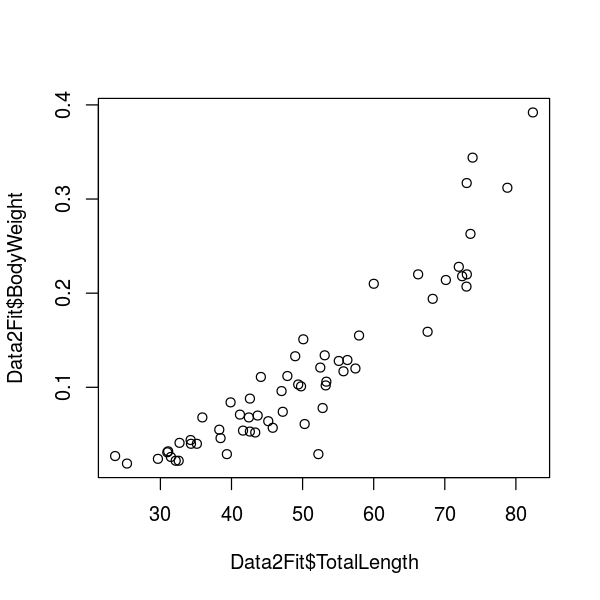

In [56]:
plot(Data2Fit$TotalLength, Data2Fit$BodyWeight)

Or better, using `ggplot`:

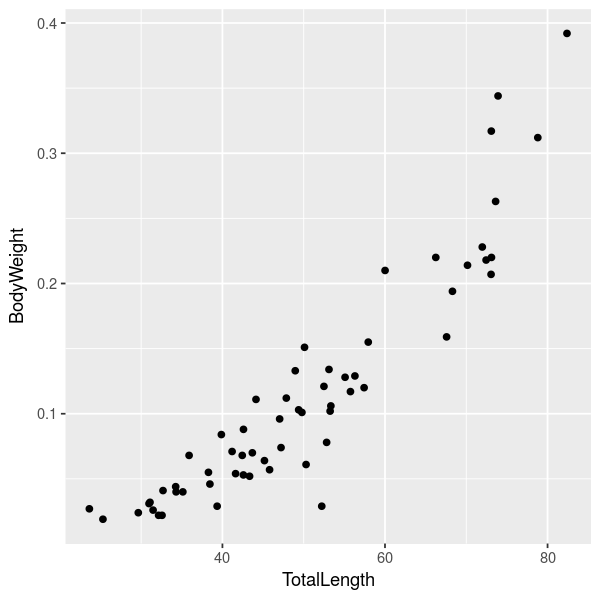

In [57]:
ggplot(Data2Fit, aes(x = TotalLength, y = BodyWeight)) + geom_point()

Now fit the model to the data using NLLS:

In [58]:
PowFit <- nlsLM(BodyWeight ~ powMod(TotalLength, a, b), data = Data2Fit, start = list(a = .1, b = .1))

We can use `summary()` just like we would for a `lm()` fit object. 

In [59]:
summary(PowFit)


Formula: BodyWeight ~ powMod(TotalLength, a, b)

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 3.941e-06  2.234e-06   1.764    0.083 .  
b 2.585e+00  1.348e-01  19.174   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02807 on 58 degrees of freedom

Number of iterations to convergence: 39 
Achieved convergence tolerance: 1.49e-08


Most of the output is analogous to the output of an `lm()`. However, further statistucal inference here cannot be done using Analysis of Variance (ANOVA), because the mdoel is not a Linear Model. Try `anova(PowFit)`, and see what happens. The `Number of iterations to convergence`, and `Achieved convergence tolerance` stem from the fact that NLLS requires computer simulations; revisit the [Lecture](https://github.com/mhasoba/TheMulQuaBio/blob/master/Lectures/NLLS/Pawar_NLLS.pdf) for an explanation of this.

Now let's visualize the fit. For this, first we need to generate a vector of body lengths (the x-axis variable) for plotting: 

In [60]:
Lengths <- seq(min(Data2Fit$TotalLength),max(Data2Fit$TotalLength),len=200)

Next, calculate the predicted line. For this, we will need to extract the coefficient from the model fit object using the `coef()`command. 

In [61]:
coef(PowFit)["a"]
coef(PowFit)["b"]

a 
3.940685e-06

b 
2.585048

So, we can do the following:

In [62]:
Predic2PlotPow <- powMod(Lengths,coef(PowFit)["a"],coef(PowFit)["b"])

Now plot the data and the fitted model line:

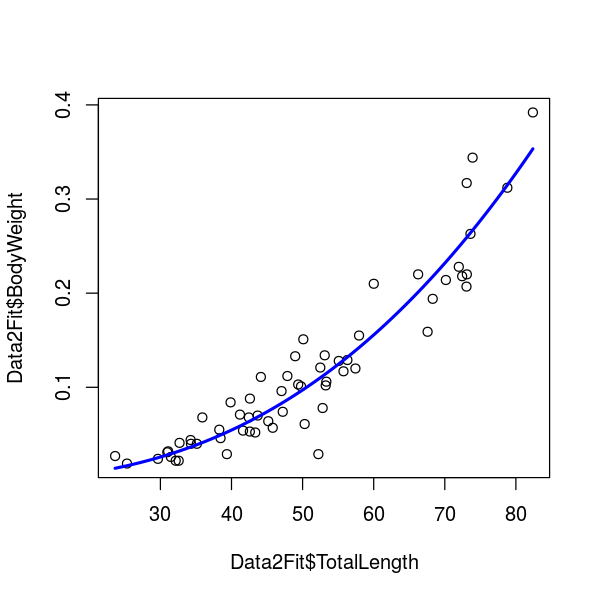

In [63]:
plot(Data2Fit$TotalLength, Data2Fit$BodyWeight)
lines(Lengths, Predic2PlotPow, col = 'blue', lwd = 2.5)

We can claculate the confidence intervals on the estimated parameters as we would in OLS fitting used for Linear Models: 

In [64]:
confint(PowFit)

Waiting for profiling to be done...


,2.5%,97.5%
a,1.171935e-06,1.205273e-05
b,2.318292e+00,2.872287e+00


As you likely have learnt before, a coefficient's CI should not include zero for it to be statistically significant (different from zero). 

#### Exercises <a id='Allom_Exercises'></a>

(a) Make the same plot as above, fitted line and all, in `ggplot`, and add (display) the equation you estimated to your new (ggplot) plot. The equation is: $\text{Weight} = 3.94 \times 10^{-06} \times \text{Length}^{2.59}$

(b) Try playing with the starting values, and see if you can "break" the model fit -- that is the NLLS fitting does not converge on a solution.

(c) Repeat the model fitting (incuding a-b above) using the Zygoptera data subset.

   
(d) There is an alternative (and in fact, more commonly-used) approach for fitting the allometric model to data: using Oridinary Least Squares on bi-logarithamically transformed data. That is, if you take a log of both sides of the [allometric equation](#eq:allom) we get,

$$
\log(y) = \log(a) + b \log(x)
$$

This is a straight line equation of the form $c = d + b z $, where $c = \log(c)$, $d = \log(a)$, $z = \log(x)$, and $b$ is now the slope parameter. So you can use Ordinary Least Squares and the linear models framework (with `lm()`) in R to estimate the parameters of the allometric equation. 

In this exercise, try comparing the NLLS vs OLS methods to se how much difference you get in the parameter estimates between them. For example, see the methods used in this paper by [Cohen et al 2012](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3465447/).

(e) The allometry between Body weight and Length is not the end of the story, you have a number of other linear morphological measurements (`HeadLength`, `ThoraxLength`, `AdbdomenLength`, `ForewingLength`, `HindwingLength`, `ForewingArea`, and `HindwingArea`) that can also be investigated. In this exercise, you will try two lines of investigation (again, repeated separately for Dragonflies and Damselfiles): 

(i) How do each of these measurs allometrically scale with Body length (obtain estimates of scaling constant and exponent)? (Hint: you may want to use the `pairs()` command in R to get an overview of all the pairs of potential scaling relationships. 
    
(ii) Do any of the linear morphological measurements other than body length better predict Body weight? That is, does body weight scale more tightly with a linear morphological measurement other than total body length? 

### Comparing two models

*How do we know that there isn't a better or alternative model that adequately explains the pattern in your dataset?* 

This is important consideration in all data analyses (and more generally, the scientific method!), so you must aim to compare your NLLS model with an one or more alternatives for a more extensive and reliable investigation of the problem. 

Let's use  model comparison to investigate whether the relationship between body weight and length we found above is indeed allometric. For this, we need an alternative model that can be fitted to the same data. Let's try a quadratic curve, which is of the form:

$$y = a + b x + c x^2$$

This can also capture curvature in data, just as the [allometric equation](#eq:allom). Note that this mode is linear in its parameters (a linear model), which You can fit to the simply data using your favorite `lm()` function:   

In [65]:
QuaFit <- lm(BodyWeight ~ poly(TotalLength,2), data = Data2Fit)

And like before, we obtain the predicted values (but this time using the `predict.lm` function):

In [66]:
Predic2PlotQua <- predict.lm(QuaFit, data.frame(TotalLength = Lengths))

Now let's plot the two fitted models together:

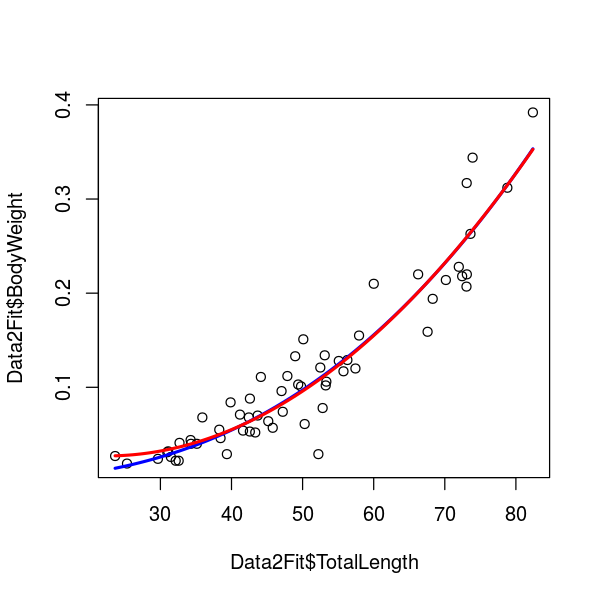

In [67]:
plot(Data2Fit$TotalLength, Data2Fit$BodyWeight)
lines(Lengths, Predic2PlotPow, col = 'blue', lwd = 2.5)
lines(Lengths, Predic2PlotQua, col = 'red', lwd = 2.5)

Very similar fits, except that the quadratic model seems to get it wrong at the lower end of the data range. Let's do a proper/formal model comparison now to check which model better-fits the data.

Let's first calculate the R$^2$ values of the two fitted models:

In [68]:
RSS_Pow <- sum(residuals(PowFit)^2)  # Residual sum of squares
TSS_Pow <- sum((Data2Fit$BodyWeight - mean(Data2Fit$BodyWeight))^2)  # Total sum of squares
RSq_Pow <- 1 - (RSS_Pow/TSS_Pow)  # R-squared value

RSS_Qua <- sum(residuals(QuaFit)^2)  # Residual sum of squares
TSS_Qua <- sum((Data2Fit$BodyWeight - mean(Data2Fit$BodyWeight))^2)  # Total sum of squares
RSq_Qua <- 1 - (RSS_Qua/TSS_Qua)  # R-squared value

RSq_Pow 
RSq_Qua

[1] 0.9005475

[1] 0.9003029

Not very useful. In general, R$^2$ is a good measure of model fit, but cannot be used for model selection -- epecially not here, given the tiby difference in the R$^2$'s.

Instead, as discussed in the lecture, we can use the Akaike Information Criterion (AIC):

In [69]:
n <- nrow(Data2Fit) #set sample size
kPow <- length(coef(PowFit)) # get number of parameters in power law model
kQua <- length(coef(QuaFit)) # get number of parameters in quadratic model

AIC_Pow <- n * log((2 * pi) / n) + n + 2 + n * log(RSS_Pow) + 2 * kPow
AIC_Qua <- n * log((2 * pi) / n) + n + 2 + n * log(RSS_Qua) + 2 * kQua
AIC_Pow - AIC_Qua

[1] -2.147426

Of course, as you might have suspected, we can do this using an in-built function in R! 

In [70]:
AIC(PowFit) - AIC(QuaFit)

[1] -2.147426

*So which model wins?* As we had dicussed in the NLLS lecture, a rule of thumb is that a AIC value difference (typically denoted as $\Delta$AIC) > 2 is a acceptable cutoff for calling a winner. So the power law (allometric model) is a better fit here. Read the [Johnson & Omland paper](https://github.com/mhasoba/TheMulQuaBio/blob/master/Readings/Modelling/JohnsonOmland2004.pdf) for more on model selection in Ecology and Evolution.    

#### Exercises

(a) Calculate the Bayesian Information Criterion (BIC), also know as the Schwarz Criterion (see your Lecture notes and the [Johnson & Omland paper](https://github.com/mhasoba/TheMulQuaBio/blob/master/Readings/Modelling/JohnsonOmland2004.pdf), and use $\Delta$BIC to select the better fitting model. 

(b) Fit a straight line to the same data and compare with the allometric and quadratic models.

(c) Repeat the model comparison (incuding 1-2 above) using the Damselflies (Zygoptera) data subset -- does the allometric mdoel still win?

(d) Repeat exercise (e)(i) and (ii) from the [above set](#Allom_Exercises), biut with model comparison (e.g., again using a quadratic as a alternative model) to establish that the relationships are indeed allometric.

## Albatross chick growth

Now let's look at a different trait example: the growth of an individual. First load and plot the data:

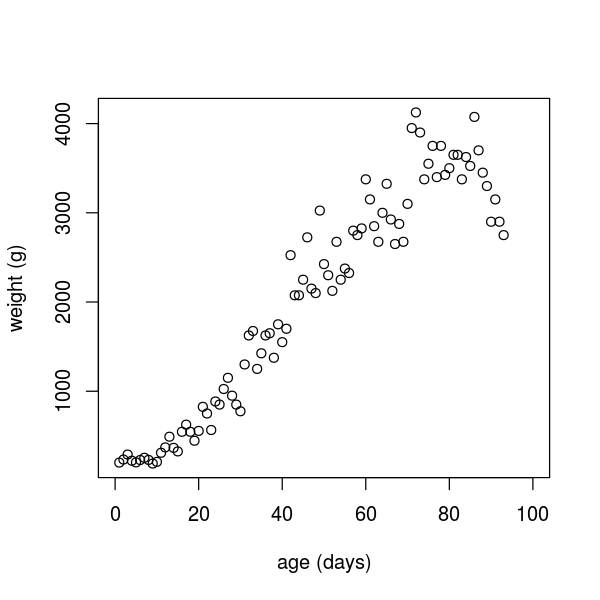

In [71]:
alb<-read.csv(file="../data/albatross_grow.csv")
alb<-subset(x=alb, !is.na(alb$wt))
plot(alb$age, alb$wt, xlab="age (days)", ylab="weight (g)", xlim=c(0, 100))

### Fitting three curves using NLS

Let's fit multiple mdoels to this dataset.

#### The Von Bertalanffy model

The Von Bertalanffy model is commonly used for modelling the growth of an individual. It's formulation is:
$$
W(t) = \rho (L_{\infty}(1-e^{-Kt})+L_0 e^{-Kt})^3
$$
If we pull out $L_{\infty}$ and define $c=L_0/L_{\infty}$ and $W_{\infty}=\rho L_{\infty}^3$ this equation becomes:
$$
W(t) = W_{\infty}(1-e^{-Kt}+ c e^{-Kt})^3.
$$
$W_{\infty}$ is interpreted as the mean asymptotic weight, and $c$ the ratio between the initial and final lengths. This second equation is the one we will fit.

We will compare this model against the classical Logistic growth equation, and a straight line. First, as we did before, let's define the R functions for the two models:

In [72]:
logistic1<-function(t, r, K, N0){
  N0*K*exp(r*t)/(K+N0*(exp(r*t)-1))
}

vonbert.w<-function(t, Winf, c, K){
  Winf*(1 - exp(-K*t) + c*exp(-K*t))^3
}

For the straight line, we use simply use R's `lm()` function, as that is a linear least squares problem. Using NLLS will give (approximately) the same answer, of course. Now fit all 3 models using least squares. 

We will scale the data before fitting to improve the stability of the estimates:

In [73]:
scale<-4000

alb.lin<-lm(wt/scale~age, data=alb)

In [74]:
alb.log<-nlsLM(wt/scale~logistic1(age, r, K, N0), start=list(K=1, r=0.1, N0=0.1), data=alb)

alb.vb<-nlsLM(wt/scale~vonbert.w(age, Winf, c, K), start=list(Winf=0.75, c=0.01, K=0.01), data=alb)

Next let's calculate predictions for each of the models across a range of ages.

In [75]:
ages<-seq(0, 100, length=1000)

pred.lin<-predict(alb.lin, newdata = list(age=ages))*scale

pred.log<-predict(alb.log, newdata = list(age=ages))*scale

pred.vb<-predict(alb.vb, newdata = list(age=ages))*scale

And finally plot the data with the fits:

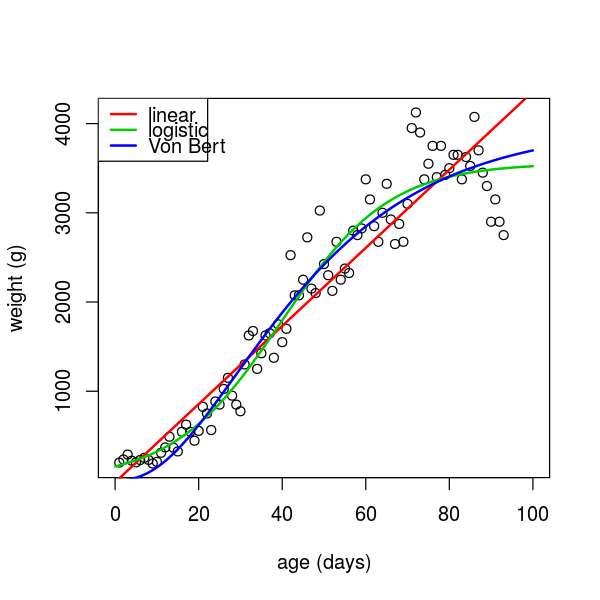

In [76]:
plot(alb$age, alb$wt, xlab="age (days)", ylab="weight (g)", xlim=c(0,100))
lines(ages, pred.lin, col=2, lwd=2)
lines(ages, pred.log, col=3, lwd=2)
lines(ages, pred.vb, col=4, lwd=2)

legend("topleft", legend = c("linear", "logistic", "Von Bert"), lwd=2, lty=1, col=2:4)

Next examine the residuals between the 3 models:

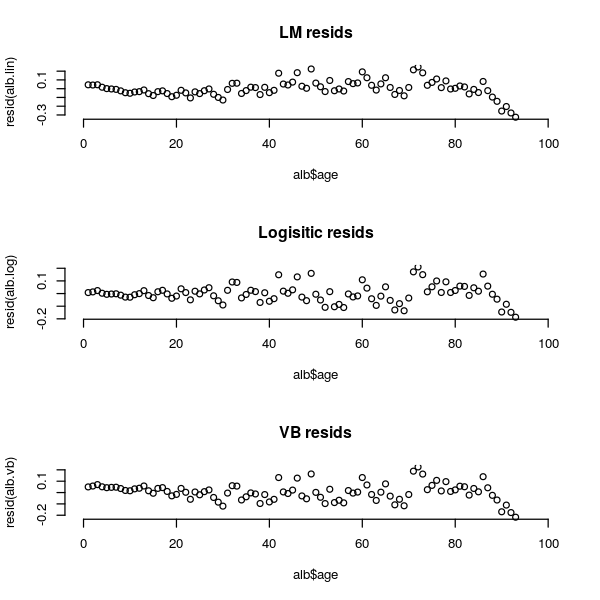

In [77]:
par(mfrow=c(3,1), bty="n")
plot(alb$age, resid(alb.lin), main="LM resids", xlim=c(0,100))
plot(alb$age, resid(alb.log), main="Logisitic resids", xlim=c(0,100))
plot(alb$age, resid(alb.vb), main="VB resids", xlim=c(0,100))

The residuals for all 3 models still exhibit some patterns. In particular, the data seems to go down near the end of the observation period, but none of these models can capture that behavior. 

Finally, let's compare the 3 models using a simpler approach than the AIC/BIC one that  we used [above](#):

In [79]:
n<-length(alb$wt)
list(lin=signif(sum(resid(alb.lin)^2)/(n-2*2), 3), 
    log= signif(sum(resid(alb.log)^2)/(n-2*3), 3), 
    vb= signif(sum(resid(alb.vb)^2)/(n-2*3), 3))          

$lin
[1] 0.00958

$log
[1] 0.0056

$vb
[1] 0.00628

The logistic model has the lowest adjusted SSE, so it's the best by this measure. It is also, visually, a better fit. 

### Excercises
* Use AIC/BIC to perform model selection as we did for the trait allometry example
* Write this example as a self-sufficient R script, with ggplot istead of base plotting 

## Aedes aegypti fecundity

Now let's actually look at a disease vector example! These data measure the reponse of *Aedes aegypti* fecundity to temperature. 

First load and visualize the data:

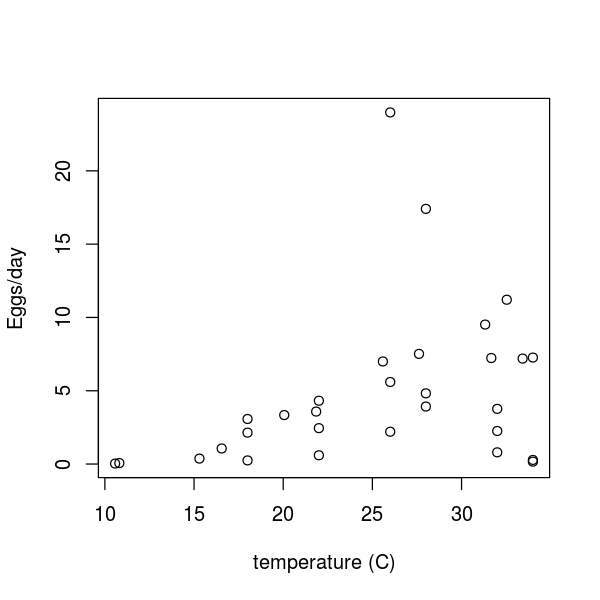

In [80]:
aedes<-read.csv(file="../data/aedes_fecund.csv")

plot(aedes$T, aedes$EFD, xlab="temperature (C)", ylab="Eggs/day")

### Fitting models

Let's define some models first:

In [82]:
quad1<-function(T, T0, Tm, c){
  c*(T-T0)*(T-Tm)*as.numeric(T<Tm)*as.numeric(T>T0)
}

briere<-function(T, T0, Tm, c){
  c*T*(T-T0)*(abs(Tm-T)^(1/2))*as.numeric(T<Tm)*as.numeric(T>T0)
}

Instead of using the inbuilt quadratic function in R, we we define our own to make it easier to choose starting values, and so that we can force the function to be equal to zero above and below the minimum and maximum temperature thresholds (more on this below). The Briere function is a commonly used model for tempoeratuire dependence of insect traits. As in the case of the albatross growth data, we will also compare these two with a strauight line (again, its a linear model, so we can just use `lm()` without needing to define a function for it). 

Now fit all 3 models using least squares. Although it's not as necessary here (as the data don't have as large values as the albatross example), we will again scale the data first: 

In [83]:
scale<-20

aed.lin<-lm(EFD/scale~T, data=aedes)

aed.quad<-nlsLM(EFD/scale~quad1(T, T0, Tm, c), start=list(T0=10, Tm=40, c=0.01), data=aedes)

aed.br<-nlsLM(EFD/scale~briere(T, T0, Tm, c), start=list(T0=10, Tm=40, c=0.1), data=aedes)

### Practical
* Complete the above example by calculating prediction, and comparing models. Write a single, self-standing script for it. Which model fits best? By what measure?
* In this script, use ggplot instead of base plotting.

## Using Maximum likelihood for fitting and selecting models

In [84]:
source("../code/logistic_functions.R")
set.seed(123)
library("deSolve")

Above we learned how to mathematical model/equation a line to data by using Least Squares. That is, we choose the parameters of the line to minimize the sum of the squares of the residuals/errors. An alternative to minimizing the sum of squared errors is to find parameters to the function such that the *likelihood* of the parameters, given the data and the model, is maximized. Please see the [lectures](https://github.com/vectorbite/VBiTraining/tree/master/lectures) for the theoretical background to the following R examples.

**TODO: Move the theoretical background in Leah's notes to lecture format**

We will first implement the (negative log) likelihood for simple linear regression in R. Note that we will do something a bit unintuitive here. We do it this way because we want to be able to use R's `optim()` function later.

In [90]:
nll.slr<-function(par, dat, ...){
  args<-list(...)
  
  b0<-par[1]
  b1<-par[2]
  X<-dat$X
  Y<-dat$Y
  if(!is.na(args$sigma)){
    sigma<-args$sigma
  } else sigma<-par[3]
  
  mu<-b0+b1*X
  
  return(-sum(dnorm(Y, mean=mu, sd=sigma, log=TRUE)))

}

### Implementing the Likelihood in R

Now let's implement the likelihood:

In [91]:
n< -30
b0 <-10
b1<-3
sigma<-2
X <- rnorm(n, mean=3, sd=7)
Y <- b0 + b1*X + rnorm(n, mean=0, sd=sigma)
dat<-data.frame(X=X, Y=Y) # convert to a data frame

[1] FALSE

Let's generate some simulated data, assuming that: 

$\beta_0=$ `r b0`, $\beta_1=$ `r b1`, and $\sigma=$ `r sigma`

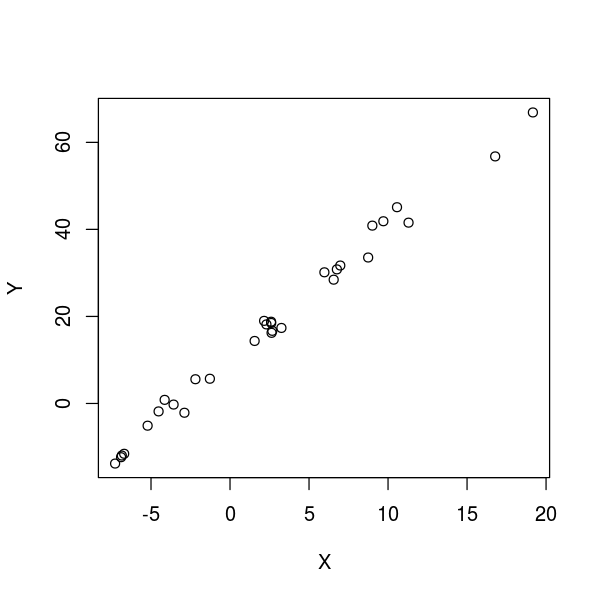

In [92]:
plot(X, Y)

### Likelihood profile in R

For now, let's assume that we know what $\beta_1$ is. Let's build a likelihood profile for the simulated data:

In [ ]:
N<-50
b0s<-seq(5, 15, length=N)
mynll<-rep(NA, length=50)
for(i in 1:N){
  mynll[i]<- nll.slr(par=c(b0s[i],b1), dat=dat, sigma=sigma)
plot(b0s, mynll, type="l")
abline(v=b0, col=2)
abline(v=b0s[which.min(mynll)], col=2)

## Likelihood surface in R

If we wanted to estimate both $\beta_0$ and $\beta_1$ the simplest approach is to do a *grid search* to find the maximum likelihood estimators.

10.0000,3
10.0303,3


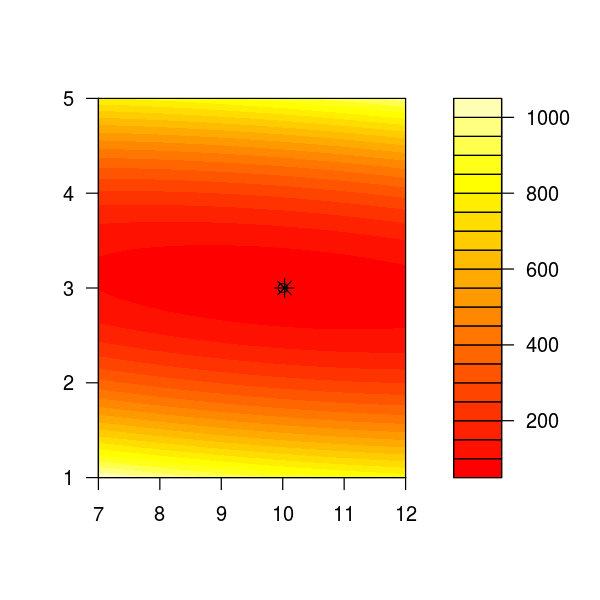

In [93]:
N0=100
N1=101
b0s<-seq(7,12, length=N0)
b1s<-seq(1,5, length=N1)

mynll<-matrix(NA, nrow=N0, ncol=N1)
for(i in 1:N0){
  for(j in 1:N1) mynll[i,j]<-nll.slr(par=c(b0s[i],b1s[j]), dat=dat, sigma=sigma)
}

ww<-which(mynll==min(mynll), arr.ind=TRUE)

b0.est<-b0s[ww[1]]
b1.est<-b1s[ww[2]]
rbind(c(b0, b1), c(b0.est, b1.est))

filled.contour(x = b0s,
               y = b1s,
               z= mynll,
               col=heat.colors(21),
               plot.axes = {axis(1); axis(2); points(b0,b1, pch=21); 
                 points(b0.est, b1.est, pch=8, cex=1.5); 
                 xlab="b0"; ylab="b1"})


## Conditional Likelihood
We can also look at the conditional surfaces (i.e., we look at the slice around whatever the best estimate is for the other parameter):

In [ ]:
par(mfrow=c(1,2), bty="n")
plot(b0s, mynll[,ww[2]], type="l", xlab="b0", ylab="NLL")
plot(b1s, mynll[ww[1],], type="l", xlab="b1", ylab="NLL")

## Alternatives to Grid Search

There are many alternative methods to grid searches. Since we are seeking to minimize an arbitrary function (the negative log likelihood) we typically use a descent method to perform general optimization.

There are lots of options implemented in the `optim`function in R. We won't go into the details of these methods, due to time constraints. However, typically one would most commonly use:

* Brent's method: for 1-D search within a bounding box, only
* L-BFGS-B (limited-memory Broyden–Fletcher–Goldfarb–Shanno algorithm with bounding box constraints): a quasi-Newton method, used for higher dimensions, when you want to be able to put simple limits on your search area.  
 

## Maximum likelihood using `optim()`

The first argument is the function that you want to minimize, and the second is a vector of starting values for your parameters. After the main arguments, you can add what you need to evaluate your function (e.g. `sigma` ).

In [94]:
fit <- optim(nll.slr, par=c(2, 1), method="L-BFGS-B", ## this is a n-D method
              lower=-Inf, upper=Inf, dat=dat, sigma=sigma)

fit

$par
[1] 9.992037 3.007438

$value
[1] 64.42789

$counts
function gradient 
      10       10 

$convergence
[1] 0

$message
[1] "CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

We can also fit sigma as the same time, if we want:

In [95]:
fit <- optim(nll.slr, par=c(2, 1, 5), method="L-BFGS-B", ## this is a n-D method
              lower=c(-Inf, -Inf, 0.1), upper=Inf, dat=dat, sigma=NA)
fit$par

[1] 9.992028 3.007438 2.069805

Now visualize it:

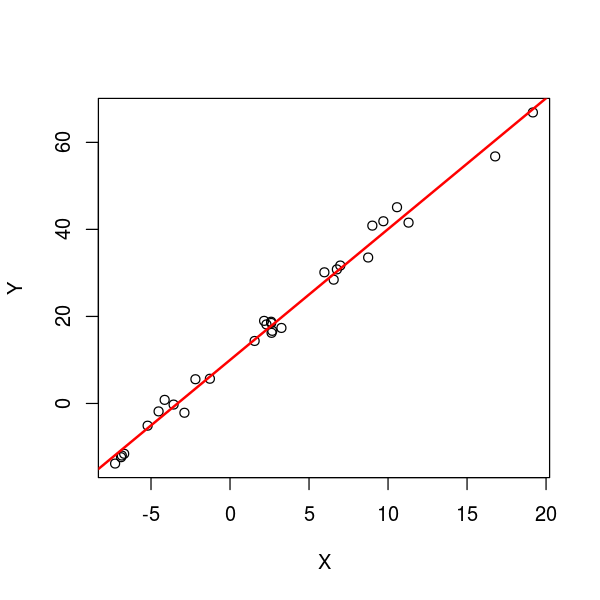

In [96]:
plot(X, Y)
abline(a=fit$par[1], b=fit$par[2], col=2, lwd=2)

## Confidence intervals

The joint distribution of the MLEs are asymptotically Normally distributed. Given this, if you are minimizing the negative log likelihood (NLL) then the covariance matrix of the estimates is (asymptotically) the inverse of the Hessian matrix. The Hessian matrix evalutes the second derivatives of the NLL (numerically here), which gives us information about the curvature the likelihood. Thus we can use the Hessian to estimate confidence intervals:

In [97]:
fit <- optim(nll.slr, par=c(2, 1), method="L-BFGS-B", hessian=TRUE, lower=-Inf, upper=Inf, dat=dat, sigma=sigma)

fisher_info<-solve(fit$hessian)
est_sigma<-sqrt(diag(fisher_info))
upper<-fit$par+1.96*est_sigma
lower<-fit$par-1.96*est_sigma
interval<-data.frame(value=fit$par, upper=upper, lower=lower)
interval

value,upper,lower
9.992037,10.758829,9.225246
3.007438,3.110892,2.903984


## Comparison to fitting with `lm()`

We can, of course, simply fit the model using the `lm()` function:

In [98]:
lmfit<-lm(Y~X)

summary(lmfit)$coeff

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),9.992039,0.41908480,23.84252,3.856810e-20
X,3.007438,0.05654231,53.18916,1.131787e-29


The estimates we get using `optim()` are almost identical to the estimates that we obtain here, and the standard errors on the intercept and slope are very similar to those we calculated from the Hessian (est_sigma= `r est_sigma`). 

## Exercises 

Try MLEs for simple trait data. You will use the same data + functions that you used to practice fitting curves using non-linear least squares methods above.

1. Using the `nll.slr` function as an example, write a function that calculates the negative log likelihood as a function of the parameters describing your trait and any additional parameters you need for an appropriate noise distribution (e.g., $\sigma$ if you have normal noise).
2. For at least one of your parameters plot a likelihood profile given your data, with the other parametes fixed.
3. Use the `optim` function to find the MLE of the same parameter and indicate this on your likelihood profile.
4. Obtain a confidence interval for your estimate.

## Readings and Resources <a id='Readings'></a>

* Motulsky, Harvey, and Arthur Christopoulos. Fitting models to biological data using linear and nonlinear regression: a practical guide to curve fitting. OUP USA, 2004.
* Johnson, J. B. & Omland, K. S. 2004 Model selection in ecology and evolution. Trends Ecol. Evol. 19, 101–108.
* The [NCEAS non-linear modelling working group](https://groups.nceas.ucsb.edu/non-linear-modeling/projects/OrangeTree)
* [Mixed-Effects Models in S and S-PLUS](https://link.springer.com/book/10.1007/b98882)